In [32]:
from matplotlib import pyplot as plt
import numpy as np
import pickle
import gzip

%matplotlib inline

# Weights matrix  and biases vector

In [8]:
sizes = [784, 100, 10]

num_layers = len(sizes)
biases = [np.random.randn(y, 1) for y in sizes[1:]]
weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])]

print([w.shape for w in weights], 'and', [b.shape for b in biases])

def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))


def feedforward(a):
    for b, w in zip(biases, weights):
        a = sigmoid(np.dot(w, a) + b)
    return a

[(100, 784), (10, 100)] and [(100, 1), (10, 1)]


In [9]:
print([w.shape for w in weights], 'and', [b.shape for b in biases])

[(100, 784), (10, 100)] and [(100, 1), (10, 1)]


In [12]:
inv = np.zeros((784, 1))

res = feedforward(inv)
print(res.shape)

(10, 1)


In [17]:
print(np.array2string(res.reshape((-1,)), separator=', ', formatter={'float_kind': lambda x: f'{x:0.2f}'}))

[0.66, 0.64, 0.99, 1.00, 0.80, 0.79, 1.00, 0.04, 0.06, 0.99]


In [11]:
def load_data():
    with gzip.open('data/mnist.pkl.gz', 'rb') as f:
        train_data, valid_data, test_data = pickle.load(f, encoding='latin1')
    
    return train_data, valid_data, test_data


train_data, valid_data, test_data = load_data()

In [13]:
[t.shape for t in train_data]

[(50000, 784), (50000,)]

In [14]:
x_train, y_train = train_data

In [16]:
y_train

array([5, 0, 4, ..., 8, 4, 8])

In [27]:
def to_categorical(x):
    return np.eye(np.unique(x).shape[0], dtype='uint8')[x]

yy_train = to_categorical(y_train)

In [23]:
yy_train = np.eye(10, dtype='uint')[y_train]

In [19]:
yy_train.shape

(50000, 10)

In [28]:
print(yy_train[0], y_train[0])

[0 0 0 0 0 1 0 0 0 0] 5


In [30]:
x_train.shape

(50000, 784)

In [31]:
xx_train = x_train.reshape((-1, 784, 1))

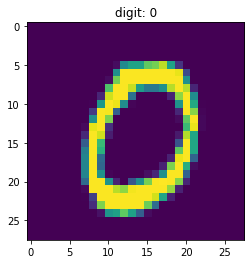

In [42]:
idx = np.random.randint(x_train.shape[0])
plt.imshow(x_train[idx].reshape((28, 28)))
plt.title(f'digit: {y_train[idx]}')
plt.show()